This lab on Cross-Validation is a python adaptation of p. 190-194 of "Introduction to Statistical Learning
with Applications in R" by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani. Written
by R. Jordan Crouser at Smith College for SDS293: Machine Learning (Spring 2016).

# Exploring the Auto dataset

In [5]:
import pandas as pd
import numpy as np
import sklearn.linear_model as skl_lm
import matplotlib.pyplot as plt

In this section, we'll explore the use of the validation set approach in order to estimate the
test error rates that result from fitting various linear models on the ${\tt Auto}$ data set.

In [8]:
auto_data = pd.read_csv('Auto.csv', na_values='?').dropna()
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


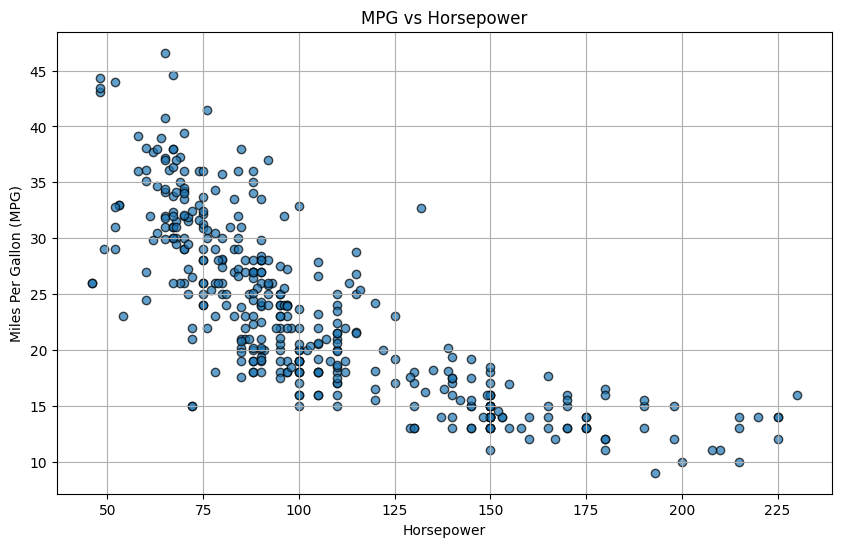

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(auto_data['horsepower'], auto_data['mpg'], alpha=0.7, edgecolor='k')
plt.title('MPG vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon (MPG)')
plt.grid(True)
plt.show()

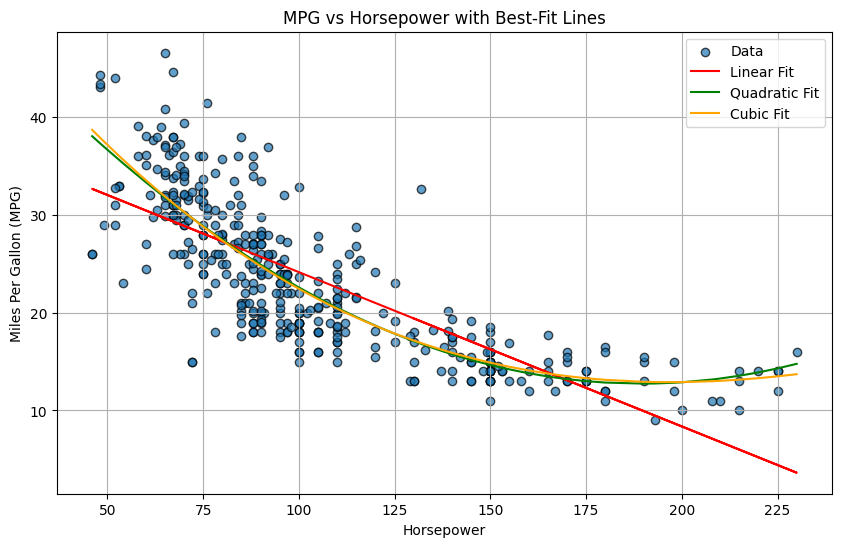

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
auto_data = pd.read_csv('Auto.csv')

# Ensure horsepower is numeric and drop missing values
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'], errors='coerce')
auto_data = auto_data.dropna(subset=['horsepower', 'mpg'])

# Extract variables
X = auto_data['horsepower']
y = auto_data['mpg']

# Fit a linear model
coeffs_linear = np.polyfit(X, y, deg=1)
linear_fit = np.polyval(coeffs_linear, X)

# Fit a quadratic model
coeffs_quadratic = np.polyfit(X, y, deg=2)

# Fit a cubic model
coeffs_cubic = np.polyfit(X, y, deg=3)

# Sort the horsepower values for plotting the quadratic and cubic fit
X_sorted = np.sort(X)
quadratic_fit = np.polyval(coeffs_quadratic, X_sorted)
cubic_fit = np.polyval(coeffs_cubic, X_sorted)

# Plot the data and the fits
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, edgecolor='k', label='Data')
plt.plot(X, np.polyval(coeffs_linear, X), color='red', label='Linear Fit')
plt.plot(X_sorted, quadratic_fit, color='green', label='Quadratic Fit')
plt.plot(X_sorted, cubic_fit, color='orange', label='Cubic Fit')
plt.title('MPG vs Horsepower with Best-Fit Lines')
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon (MPG)')
plt.legend()
plt.grid(True)
plt.show()
